In [7]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [8]:
# nltk count words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# dataset wocka

In [9]:
# Load the data from the JSON file
data_path = './data/wocka.json'
with open(data_path) as f:
    data = json.load(f)

In [10]:
# create pandas dataframe of the data
df = pd.DataFrame(data)
df.head()

body      category  id  \
0  What do you call a cow with no legs?\r\n\r\nGr...        Animal   1   
1  What do you call a cow jumping over a barbed w...        Animal   2   
2  What's black and white and red all over?\r\n\r...  Other / Misc   4   
3  So, this guy walks into a bar.\r\n\r\nAnd says...           Bar   5   
4  If the opposite of pro is con, isn't the oppos...    One Liners   6   

                  title  
0      Cow With No Legs  
1           Jumping Cow  
2  Black, White and Red  
3          Guy in a Bar  
4              Progress

Animal
At Work
Bar
Blond
Blonde
Children
College
Gross
Insults
Knock-Knock
Lawyer
Lightbulb
Medical
Men / Women
News / Politics
One Liners
Other / Misc
Puns
Redneck
Religious
Sports
Tech
Yo Mama
Yo Momma
amount of categories: 24


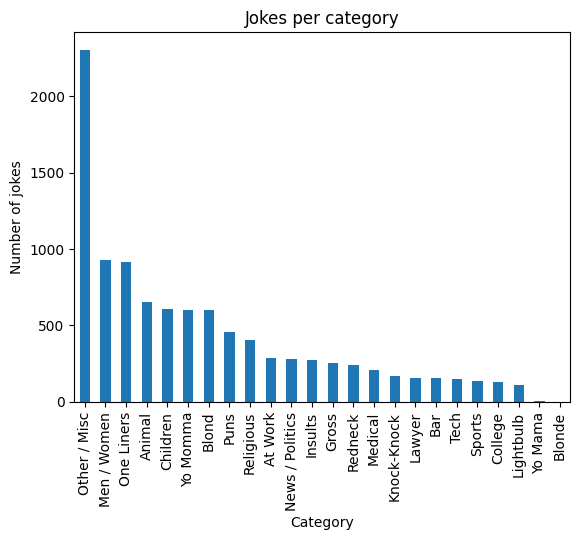

In [11]:
#print unique categories
categories = df['category'].unique()
categories= sorted(categories)
for category in categories:
    print(category)
print('amount of categories:', len(categories))
# plot the distribution of categories
category_counts = df['category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Jokes per category')
plt.ylabel('Number of jokes')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()


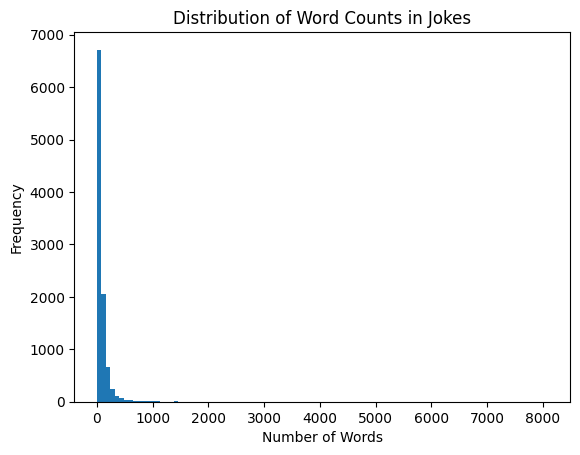

In [12]:
stop_words = set(stopwords.words('english'))

# get all the jokes
jokes = df['body'].values

# tokenize the jokes
tokenized_jokes = [word_tokenize(joke) for joke in jokes]

# remove stop words
filtered_jokes = [[word for word in joke if word.lower() not in stop_words] for joke in tokenized_jokes]

# count the number of words in each joke
word_counts = [len(joke) for joke in filtered_jokes]

# plot the distribution of word counts
plt.hist(word_counts, bins=100)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Jokes')
plt.show()

In [13]:
# count the frequency of each word
word_freq = Counter()
for joke in filtered_jokes:
    word_freq.update(joke)

# get the most common words
most_common = word_freq.most_common(100)

for word, count in most_common:
    print(word, count)

. 71849
, 61789
'' 25674
`` 23253
? 14285
! 10304
: 10000
's 9615
n't 6959
-- 5676
said 4701
) 3969
man 3745
one 3715
* 3580
- 3213
says 2901
get 2802
... 2630
( 2429
like 2314
would 2205
know 2083
'm 2081
asked 2054
' 1964
back 1959
're 1951
time 1843
go 1835
day 1812
got 1661
first 1497
people 1455
say 1431
could 1419
two 1415
'll 1373
went 1346
take 1301
little 1298
see 1289
; 1260
wife 1238
going 1207
old 1187
've 1176
want 1175
woman 1156
car 1156
replied 1142
Well 1139
make 1126
guy 1122
blonde 1117
think 1107
home 1086
$ 1074
good 1054
Q 1044
next 1039
around 1025
One 1024
2 1016
right 976
ca 975
asks 967
way 959
Yo 953
new 952
tell 948
put 947
call 942
'd 934
1 933
came 920
3 892
told 883
boy 877
come 834
God 826
never 818
room 816
name 816
door 808
really 806
night 803
house 800
goes 794
look 767
â¢ 767
love 758
give 755
dog 754
work 752
still 734
called 724
years 719
last 712
Oh 712
